# **Regularización**


En modelos de inteligencia artificial, la regularización es el proceso matemático consistente en agregar información para resolver un problema mal planteado o para evitar el overfitting. En otras palabras, la regularización es la agregación de algunos parámetros, llamados penalización, para mejorar el rendimiento de los modelos de IA y evitar problemas como el sobreajuste, es decir, ayudan a mejorar el proceso de generalización de los modelos de IA.

Consiste en agregar un término a la función de costo para penalizar modelos con parámetros muy grandes o complejos, previniendo el sobreajuste.

# **Tecnicas de regularización comunes**

## **1.- Regularización L1 o Lasso:** 

Agrega un termino de penallizacion a la funcion de perdida del modelo, que es proporcional a la suma de los valores absolutos de los pesos __w__.  Este concepto se puede aplicar a las redes neuronales artificiales, pero también se puede aplicar a otros algoritmos de IA, como regresiones lineales, polinómicas y logística, máquinas de soporte vectorial, etc. Y en términos matemáticos se representaría así:

#### $$\frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j|$$

Al aplicarlo a una funcion de perdida $J$ queda de la siguiente manera:

#### $$J_{total} = J_{original} + \lambda \cdot \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j|$$

Donde:

- $J_{original}$ es la funcion de perdida original.
- $\lambda$ es el hiperparametro de regularizacion, que controla la magnitud de la penalizacion
- $w_{j}$ son los pesos del modelo

### L1 aplicado a una funcion de perdida

Si agregamos esta penalizacion a la funcion de perdida __Error cuadratico medio__, quedaria:

#### $$J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + \lambda \cdot \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j|$$

### Cuando usar la regularizacion Lasso 

L1 es de ayuda cuando hay sospecha de que varias de las variables de entrada sean irrelevantes, es decir, aportan poco o nada a la solución del problema. 

Al usar L1 , se está favoreciendo que la solución sea poco densa. Es decir, que algunos de los coeficientes terminen valiendo 0. Esto puede ser muy útil para determinar cuáles de los atributos de entrada son los más relevantes y que influyan en la obtención de modelos que generalice mejor.

Lasso es muy útil en este sentido, pues hace la selección de atributos de entrada y funciona mejor cuando las variables no están muy correlacionadas entre sí.

## **2.- Regularización L2 (Ridge):** 

Tecnica que agrega una penalizacion a la funcion de perdida que depende del cuadrado de los pesos __w__ del modelo.

La penalización fuerza a los pesos a tener valores más pequeños, lo que evita que el modelo dependa demasiado de características particulares de los datos de entrenamiento (reduciendo el sobreajuste).

Al igual que ocurría en L1, L2 se puede aplicar a varias técnicas de ML. En terminos matematicos, se representa como sigue:

#### $$\lambda \cdot \displaystyle \frac{1}{2 \cdot N} \cdot \displaystyle\sum_{j=1}^{N}w_j^2$$

### L2 aplicado a una funcion de perdida

Al agregar esta regularizacion a la funcion de perdida __Error Cuadratico Medio__, quedaria:

#### $$J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + \lambda \cdot \displaystyle \frac{1}{2 \cdot N} \cdot \displaystyle\sum_{j=1}^{N}w_j^2$$

### Cuando usar la regularizacion Ridge

Se recomienda usar esta regularización L2 cuando existen sospechas de que varias de las variables de entrada estén correlacionadas entre ellas. 𝑅𝑖𝑑𝑔𝑒 hace que los coeficientes acaben siendo más pequeños. Esta disminución de los coeficientes minimiza el efecto de la correlación entre los atributos de entrada y hace que el modelo generalice mejor.

Esta L2 funciona mejor cuando la mayoría de los atributos son relevantes.

## **3.- Regularización $ElasticNet\ (L1\ y\ L2)$**

Elastic Net es una técnica de regularización que combina L1 (Lasso) y L2 (Ridge) para mejorar la estabilidad y la capacidad de selección de características de un modelo de IA.

Utiliza un parametro $r$ que indica la importancia relativa que pueden tener _Lasso_ y _Ridge_ respectivamente.

#### $$C = r \cdot Lasso + (1-r) \cdot Ridge$$

### ElasticNet aplicado a una funcion de perdida

Para este caso, aplicamos la regularizacion $C$ a la funcion de perdida __Error Cuadratico Medio__, la cual se expresa como sigue:

#### $$J = \frac{1}{M}\displaystyle\sum_{i=1}^{M}(y_i\ - \ f(x_i))^2 + r \cdot \lambda \frac{1}{N}\displaystyle\sum_{j=1}^{N}|w_j| + (1-r) \cdot \lambda \frac{1}{2N}\displaystyle\sum_{j=1}^{N}w_j^2$$

> Si $r=1$, entonces el tercer termino de la ecuacion se hace cero y la regularizacion e vuelve L1.

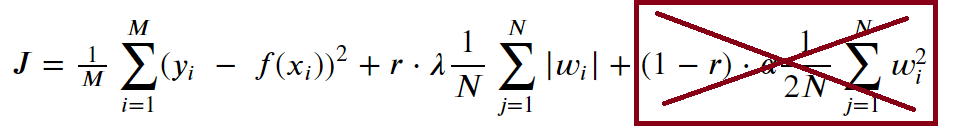

> Si $r=0$, entonces el segundo termino de la ecuacion anterior e hace cero y la regularizacion se convierte en solo L2

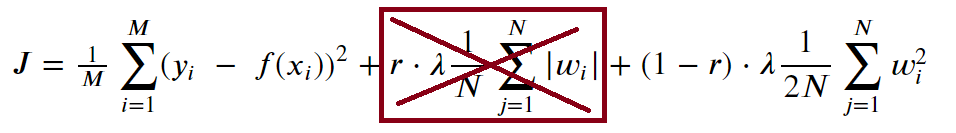

#### **Técnicas comunes de regularización en redes neuronales**
* **Dropout:**
Funciona desconectando neuronas de manera aleatoria durante el entrenamiento para evitar que el modelo dependa demasiado de neuronas específicas.


* **Early Stopping:**
Detiene el entrenamiento antes de que el modelo sobreentrene, utilizando los datos de validación.


* **Batch Normalization:**
Explicación de cómo la normalización de lotes ayuda a estabilizar el entrenamiento de redes neuronales profundas.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Cargar el dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Crear el modelo con Dropout
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))  # Regularización con Dropout
model.add(Dense(10, activation='softmax'))

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Evaluar el modelo
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
